## ML Final Proyect Eugenio Ribón

### 1. Exploratory Data Analysis

Caracteres especiales 

-9 No Bureau Record or No Investigation

-8 No Usable/Valid Trades or Inquiries

-7 Condition not Met (e.g. No Inquiries, No Delinquencies)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn.preprocessing import StandardScaler

### Primer vistazo al dataframe

In [4]:
df = pd.read_csv("FICO_Dataset.csv", sep=";")

In [5]:
df.sample(10)

,RiskPerformance,ExternalRiskEstimate,NetFractionRevolvingBurden,AverageMInFile,MSinceOldestTradeOpen,PercentTradesWBalance,PercentInstallTrades,NumSatisfactoryTrades,NumTotalTrades,PercentTradesNeverDelq,MSinceMostRecentInqexcl7days
7345,0.0,89,3,75,137.0,50.0,0,14.0,14.0,100,-8
4018,1.0,55,38,56,97.0,67.0,20,6.0,10.0,40,0
3313,1.0,65,65,66,163.0,95.0,34,46.0,47.0,96,0
4940,0.0,81,9,48,106.0,57.0,39,18.0,18.0,100,0
1563,NaN,69,84,98,181.0,91.0,33,21.0,37.0,100,21
3553,0.0,77,51,110,167.0,67.0,31,23.0,26.0,100,15
3753,1.0,69,45,125,280.0,43.0,24,16.0,17.0,88,0
4305,1.0,67,104,40,121.0,100.0,87,14.0,15.0,100,0
4890,1.0,83,4,69,175.0,40.0,38,16.0,16.0,100,0
5810,1.0,67,3,80,204.0,40.0,39,19.0,23.0,95,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RiskPerformance               5245 non-null   float64
 1   ExternalRiskEstimate          7442 non-null   int64  
 2   NetFractionRevolvingBurden    7442 non-null   int64  
 3   AverageMInFile                7442 non-null   int64  
 4   MSinceOldestTradeOpen         7415 non-null   float64
 5   PercentTradesWBalance         7386 non-null   float64
 6   PercentInstallTrades          7442 non-null   int64  
 7   NumSatisfactoryTrades         7425 non-null   float64
 8   NumTotalTrades                7419 non-null   float64
 9   PercentTradesNeverDelq        7442 non-null   int64  
 10  MSinceMostRecentInqexcl7days  7442 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 639.7 KB


### Eliminación de nans

In [7]:
df2 = df.copy()
df2.dropna(inplace=True)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5122 entries, 0 to 7441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RiskPerformance               5122 non-null   float64
 1   ExternalRiskEstimate          5122 non-null   int64  
 2   NetFractionRevolvingBurden    5122 non-null   int64  
 3   AverageMInFile                5122 non-null   int64  
 4   MSinceOldestTradeOpen         5122 non-null   float64
 5   PercentTradesWBalance         5122 non-null   float64
 6   PercentInstallTrades          5122 non-null   int64  
 7   NumSatisfactoryTrades         5122 non-null   float64
 8   NumTotalTrades                5122 non-null   float64
 9   PercentTradesNeverDelq        5122 non-null   int64  
 10  MSinceMostRecentInqexcl7days  5122 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 480.2 KB


In [9]:
df2.describe()

,RiskPerformance,ExternalRiskEstimate,NetFractionRevolvingBurden,AverageMInFile,MSinceOldestTradeOpen,PercentTradesWBalance,PercentInstallTrades,NumSatisfactoryTrades,NumTotalTrades,PercentTradesNeverDelq,MSinceMostRecentInqexcl7days
count,5122.000000,5122.000000,5122.000000,5122.000000,5122.00000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.00000
mean,0.508590,71.101913,34.588052,77.169075,200.73116,65.480476,34.601913,21.138032,22.850059,91.311597,2.19387
std,0.499975,12.593976,29.112502,33.560991,99.22485,22.773417,17.386041,11.302047,12.250118,15.225203,5.00721
min,0.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000
25%,0.000000,64.000000,8.250000,57.000000,135.25000,50.000000,22.000000,13.000000,15.000000,89.000000,0.00000
50%,1.000000,72.000000,29.000000,75.000000,185.00000,67.000000,33.000000,20.000000,22.000000,97.000000,0.00000
75%,1.000000,80.000000,56.000000,94.000000,260.00000,82.000000,46.000000,28.000000,30.000000,100.000000,3.00000
max,1.000000,93.000000,232.000000,322.000000,604.00000,100.000000,100.000000,78.000000,100.000000,100.000000,24.00000


### Eliminación de caracteres especiales

In [10]:
# Ahora voy a eliminar aquellos caractéres especiales para poder normalizar las variables
# He decidido eliminarlos por que no son tantos datos y pienso que aportan más ruido que información

# Crear una lista de valores a eliminar
values_to_remove = [-9, -7, -8]

# Eliminar las filas que contienen al menos uno de los valores en la lista
df_cleaned = df2[~df2.isin(values_to_remove).any(axis=1)]

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4972 entries, 0 to 7291
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RiskPerformance               4972 non-null   float64
 1   ExternalRiskEstimate          4972 non-null   int64  
 2   NetFractionRevolvingBurden    4972 non-null   int64  
 3   AverageMInFile                4972 non-null   int64  
 4   MSinceOldestTradeOpen         4972 non-null   float64
 5   PercentTradesWBalance         4972 non-null   float64
 6   PercentInstallTrades          4972 non-null   int64  
 7   NumSatisfactoryTrades         4972 non-null   float64
 8   NumTotalTrades                4972 non-null   float64
 9   PercentTradesNeverDelq        4972 non-null   int64  
 10  MSinceMostRecentInqexcl7days  4972 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 466.1 KB


### Comprobación de la distribución de los datos y relaciones entre variables

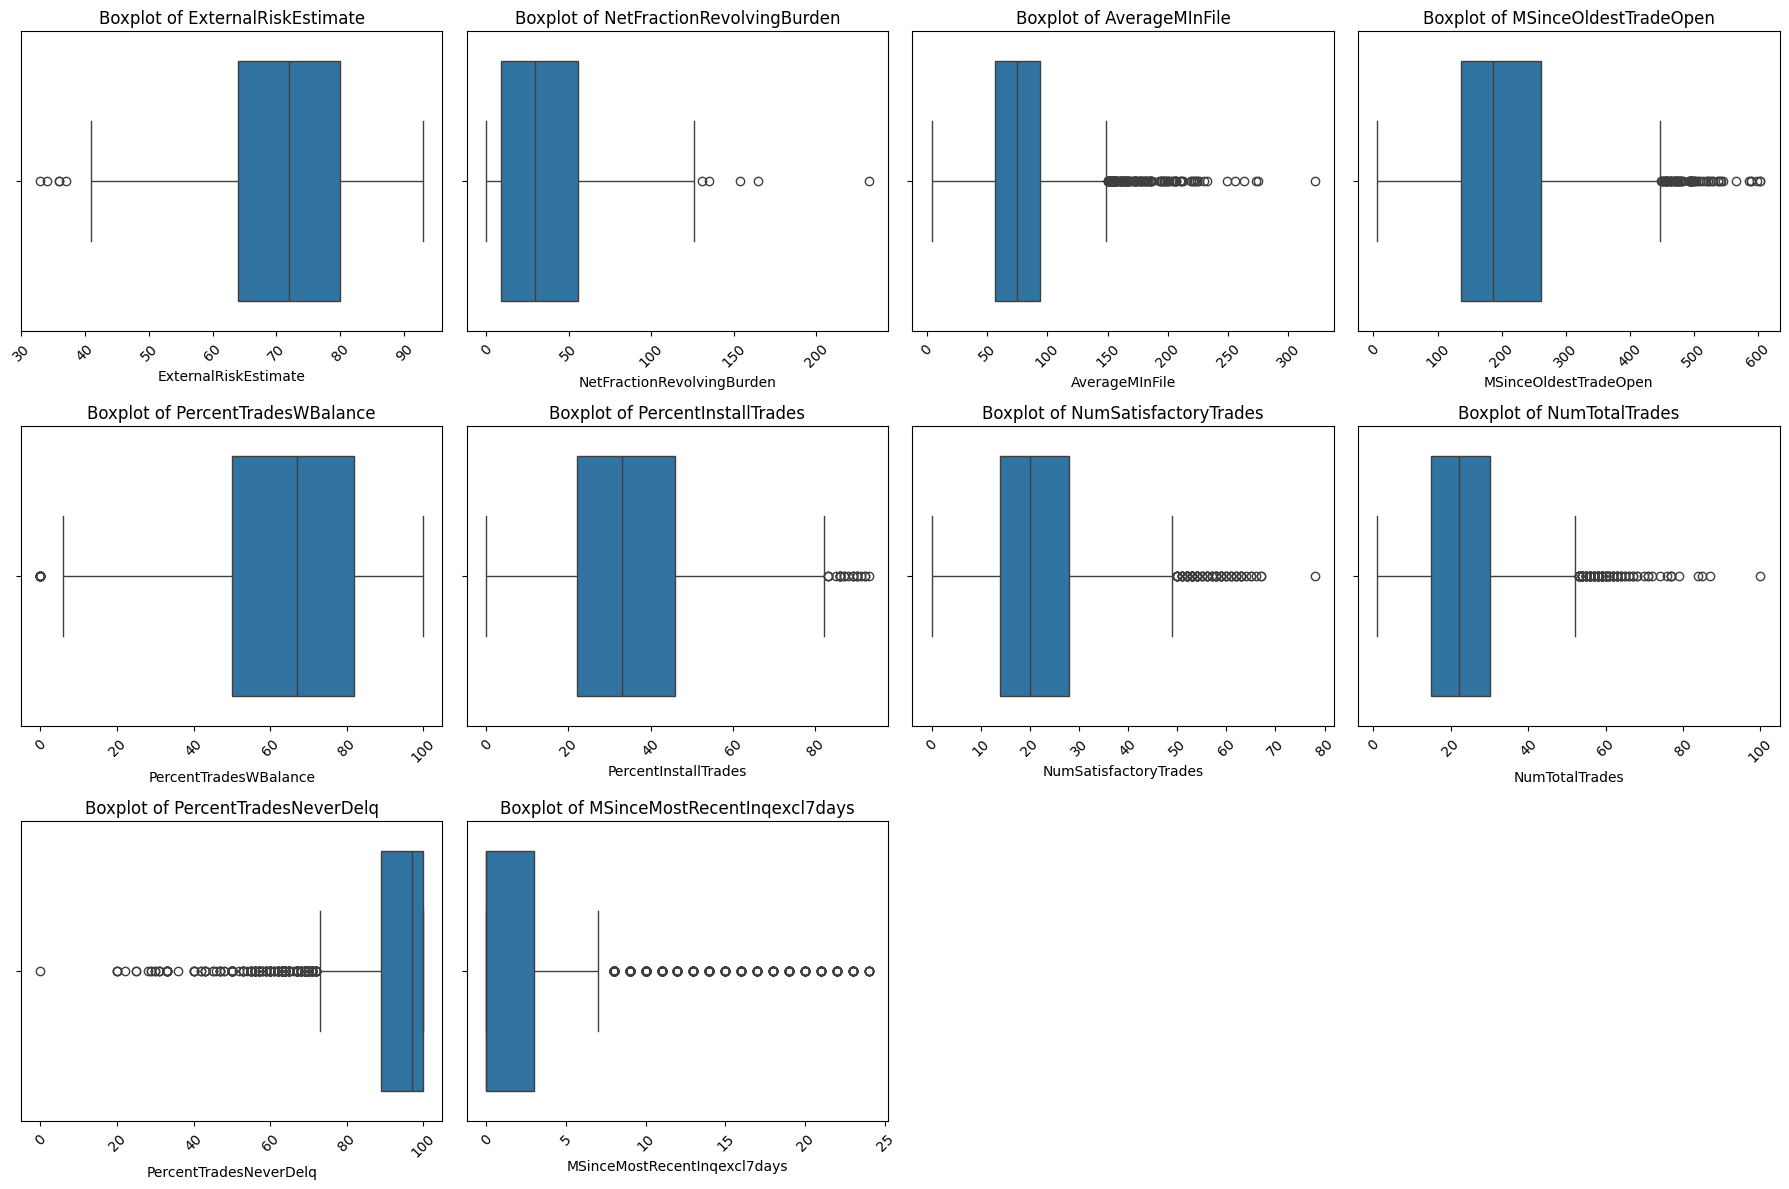

In [122]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(df_cleaned.columns[1:], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

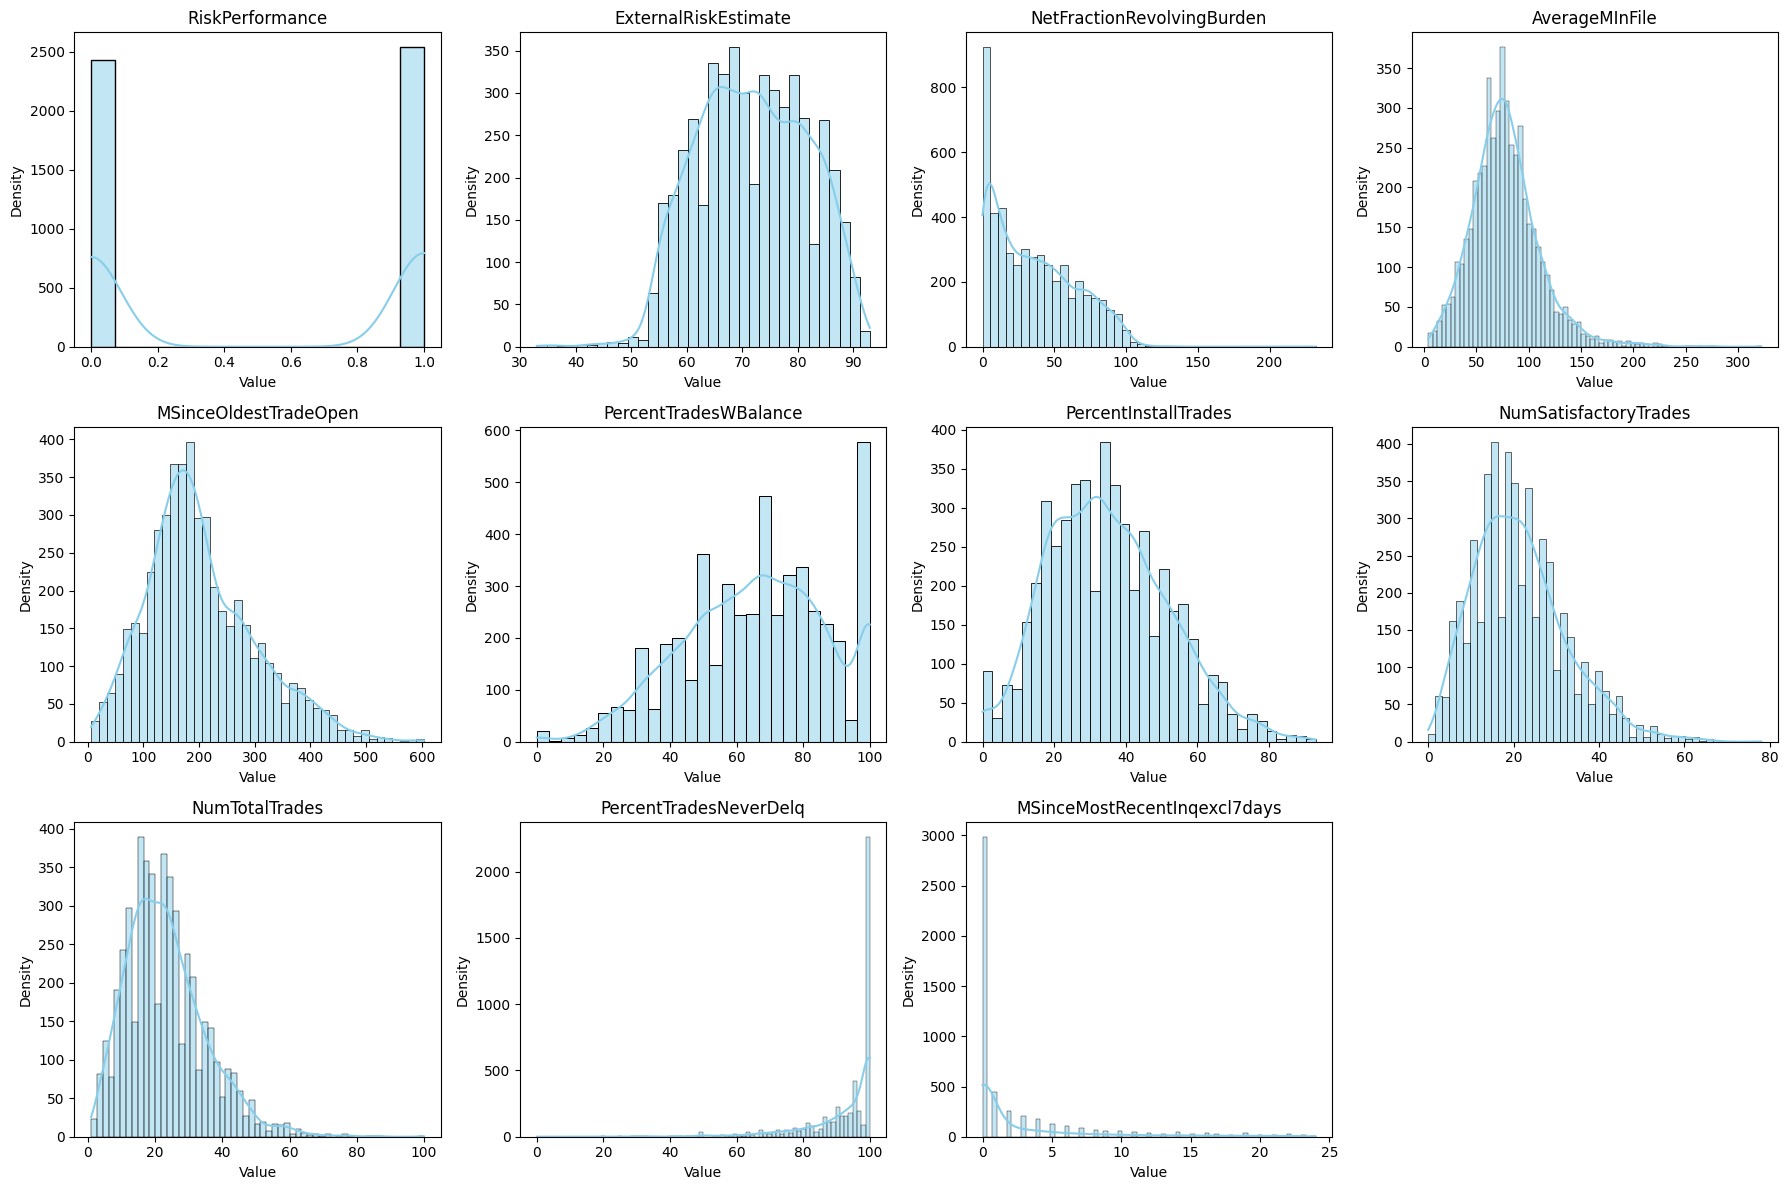

In [13]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_cleaned[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Correlaciones entre variables 

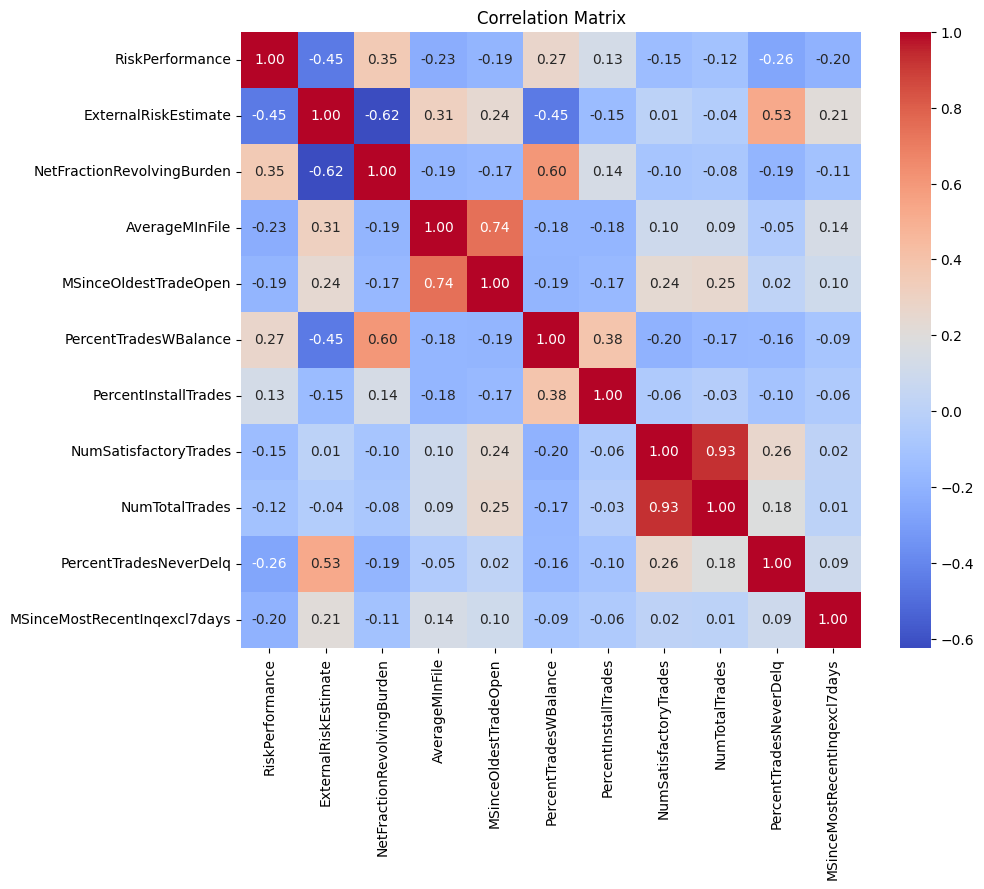

In [127]:
# Calcular la matriz de correlación
correlation_matrix = df_cleaned.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

### Comprobación balanceo de clases

In [15]:
df_cleaned["RiskPerformance"].value_counts()
# Parece que ambas clases estan balanceadas

RiskPerformance
1.0    2538
0.0    2434
Name: count, dtype: int64

### División entre Training y Test y normalización

In [17]:
input = df.columns[1:]
output = df.columns[0]

In [19]:
df_sampled = df_cleaned.sample(n=df_cleaned.shape[0], random_state=35)
X = df_sampled[input]
Y = df_sampled[output]
corte = int(df2.shape[0]*0.8//1)

In [21]:
x_train = X.iloc[:corte]
y_train = Y.iloc[:corte]
x_test = X.iloc[corte:]
y_test = Y.iloc[corte:]

In [105]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [111]:
train_data_scaled = pd.concat([pd.DataFrame(x_train_scaled, columns=x_train.columns).reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_data_scaled = pd.concat([pd.DataFrame(x_test_scaled, columns=x_test.columns).reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [116]:
train_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ExternalRiskEstimate          4097 non-null   float64
 1   NetFractionRevolvingBurden    4097 non-null   float64
 2   AverageMInFile                4097 non-null   float64
 3   MSinceOldestTradeOpen         4097 non-null   float64
 4   PercentTradesWBalance         4097 non-null   float64
 5   PercentInstallTrades          4097 non-null   float64
 6   NumSatisfactoryTrades         4097 non-null   float64
 7   NumTotalTrades                4097 non-null   float64
 8   PercentTradesNeverDelq        4097 non-null   float64
 9   MSinceMostRecentInqexcl7days  4097 non-null   float64
 10  RiskPerformance               4097 non-null   float64
dtypes: float64(11)
memory usage: 352.2 KB


In [115]:
train_data_scaled.describe()

,ExternalRiskEstimate,NetFractionRevolvingBurden,AverageMInFile,MSinceOldestTradeOpen,PercentTradesWBalance,PercentInstallTrades,NumSatisfactoryTrades,NumTotalTrades,PercentTradesNeverDelq,MSinceMostRecentInqexcl7days,RiskPerformance
count,4.097000e+03,4.097000e+03,4.097000e+03,4.097000e+03,4.097000e+03,4.097000e+03,4.097000e+03,4.097000e+03,4.097000e+03,4.097000e+03,4097.000000
mean,2.896281e-16,-6.416910e-17,-2.904953e-17,3.815460e-17,-2.792223e-16,-3.772103e-17,-1.005894e-16,9.928868e-17,4.288057e-16,5.874941e-17,0.503295
std,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,0.500050
min,-3.977215e+00,-1.223772e+00,-2.297017e+00,-2.036485e+00,-3.075920e+00,-2.095040e+00,-1.974155e+00,-1.873562e+00,-8.061324e+00,-5.217298e-01,0.000000
25%,-7.996711e-01,-9.129484e-01,-6.469579e-01,-6.718131e-01,-7.534248e-01,-7.728466e-01,-6.964554e-01,-6.995820e-01,-2.891597e-01,-5.217298e-01,0.000000
50%,2.034016e-02,-1.531570e-01,-8.656045e-02,-1.755689e-01,3.622344e-02,-1.117499e-01,-1.488697e-01,-1.125922e-01,4.094618e-01,-5.217298e-01,1.000000
75%,8.403514e-01,7.102424e-01,5.049702e-01,5.998126e-01,7.794218e-01,6.695461e-01,5.812446e-01,5.582533e-01,6.714448e-01,1.009113e-01,1.000000
max,2.172870e+00,6.788574e+00,7.603338e+00,4.145891e+00,1.569070e+00,3.494232e+00,5.144459e+00,6.428151e+00,6.714448e-01,4.459399e+00,1.000000


In [114]:
train_data_scaled.to_csv("train.dat", sep = "\t", index = False)
test_data_scaled.to_csv("test.dat", sep = "\t", index = False)